In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
iteraciones = 5
N = 100
P = 10
p_sinapsis = np.arange(0.0,1.05,0.05)
error = np.zeros([p_sinapsis.shape[0], iteraciones])

for it in tqdm(range(iteraciones)):
    for index,k in enumerate(p_sinapsis):
        # genero patrones aleatorios
        patrones = np.random.choice([1, -1], size=[P,N])
        
        # genero la matriz de pesos
        w = np.zeros((N, N))
        for p in range(P):
            w += np.dot(patrones[p].reshape(-1,1),np.transpose(patrones[p].reshape(-1,1)))
        np.fill_diagonal(w,0)
        w /= N
        
        # elimino sinapsis
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                if random.random()<k:
                    w[i,j] = 0                    

        # reconstruyo
        recontruido = np.sign(np.dot(patrones,w))
        recontruido = np.where(recontruido==0, 1, recontruido)
        error[index, it] = np.count_nonzero(recontruido - patrones)/ (N*P)

100%|██████████| 5/5 [00:00<00:00,  5.68it/s]


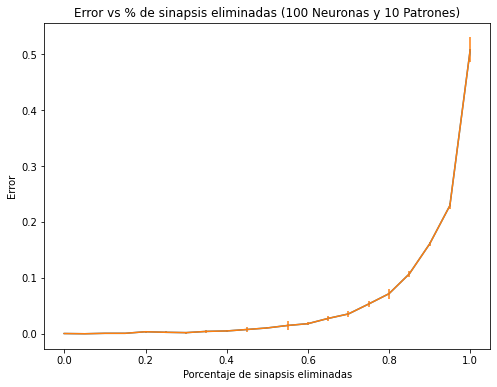

In [12]:
# calculo la media y la varianza del error
error_mean = np.mean(error, axis=1)
error_var = np.sqrt(np.var(error, axis=1))

#grafico
fig = plt.figure(figsize = (8, 6))
plt.plot(p_sinapsis,error_mean)
plt.errorbar(p_sinapsis, error_mean, error_var)
plt.title("Error vs % de sinapsis eliminadas ({} Neuronas y {} Patrones)".format(N,P))
plt.ylabel("Error")
plt.xlabel("Porcentaje de sinapsis eliminadas")
plt.show()

In [13]:
"""
plt.subplot(3, 1, 1)
plt.imshow(patrones, cmap='gray')
plt.title("Patron original")
plt.subplot(3, 1, 2)
plt.imshow(recontruido, cmap='gray')
plt.title("Patron reconstrudo")
plt.subplot(3, 1, 3)
plt.imshow(recontruido - patrones, cmap='gray')
plt.title("Diferencia")

plt.show()
"""

'\nplt.subplot(3, 1, 1)\nplt.imshow(patrones, cmap=\'gray\')\nplt.title("Patron original")\nplt.subplot(3, 1, 2)\nplt.imshow(recontruido, cmap=\'gray\')\nplt.title("Patron reconstrudo")\nplt.subplot(3, 1, 3)\nplt.imshow(recontruido - patrones, cmap=\'gray\')\nplt.title("Diferencia")\n\nplt.show()\n'

In [14]:
N = 100
iteraciones = 10
p_error = 0.01
capacidad = np.zeros([p_sinapsis.shape[0], iteraciones])

for m in tqdm(range(iteraciones)):
    #print("\nInteración {}:".format(m))
    for index, k in enumerate(p_sinapsis):
        P = 1
        error = 0
        while error<p_error:
            # genero patrones aleatorios
            patrones = np.random.choice([1, -1], size=[P,N])
            # genero la matriz de pesos
            w = np.zeros((N, N))
            for p in range(P):
                w += np.dot(patrones[p].reshape(-1,1),np.transpose(patrones[p].reshape(-1,1)))
            np.fill_diagonal(w,0)
            w /= N

            # elimino sinapsis
            for i in range(w.shape[0]):
                for j in range(w.shape[1]):
                    if random.random()<k:
                        w[i,j] = 0

            #reconstruyo el estado
            recontruido = np.sign(np.dot(patrones,w))
            recontruido = np.where(recontruido==0, 1, recontruido)
            error = np.count_nonzero(recontruido - patrones)/ (N*P)
            P = P+1

        capacidad[index,m] = P/N
        #print("Probabilidad de sinapsis: {:0.2f}. Cantidad de patrones: {:2d}. Capacidad: {:0.2f}.".format(k, P, capacidad[index,m]))

100%|██████████| 10/10 [00:23<00:00,  2.36s/it]


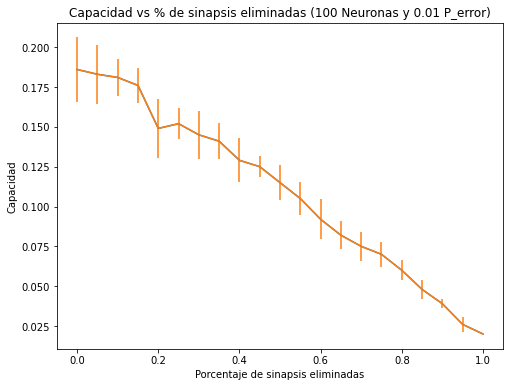

In [15]:
# calculo la media y la varianza de la capacidad
capacidad_mean = np.mean(capacidad, axis=1)
capacidad_var = np.sqrt(np.var(capacidad, axis=1))

# grafico
fig = plt.figure(figsize = (8, 6))
plt.plot(p_sinapsis,capacidad_mean)
plt.errorbar(p_sinapsis, capacidad_mean, capacidad_var)
plt.title("Capacidad vs % de sinapsis eliminadas ({} Neuronas y {} P_error)".format(N,p_error))
plt.ylabel("Capacidad")
plt.xlabel("Porcentaje de sinapsis eliminadas")
plt.show()